In [16]:
import scipy.constants as scc
import numpy as np
import xraydb as xdb
from refl_funs import get_layers_info, reflection_matrix, mlayer_rough, mlayer_conv,standing_wave
from matplotlib import pyplot as plt
from pySWXF import refl_funs as rf
from tabulate import tabulate 
# Define the incident energy (in eV)
E = 17500  # Example energy

# Define the layers
air = xdb.get_material('air')
Si = xdb.get_material('Si')

# note: roughness of first layer is meaningless as it refers to the top roughness and there 
# is no top to the first layer

# format (chemical formula, density (g/cc), thickness (angstrom), roughness (angstrom))

roughness = 3.0 # roughness in angstroms
layers = [(air[0],air[1],0,0),  (Si[0], Si[1], 0, roughness)]

# Get the layer information
n_r, h_i, sig_i = get_layers_info(E, layers)

def print_layer_info(layers, n_r, h_i, sig_i):
    """
    Print the detailed information about the layers.
    
    Parameters
    ----------
    layers : list of tuples
        List containing tuples with material name, density, thickness, and roughness.
    n_r : numpy array of complex
        Array of refractive indices for each layer.
    h_i : numpy array of floats
        Array of thicknesses for each layer (in meters).
    sig_i : numpy array of floats
        Array of roughnesses for each layer (in meters).
    """
    headers = ["Layer", "Material", "Density (g/cc)", "Thickness (Å)", "Roughness (Å)", "Refractive Index - 1 (× 10^6)"]
    table = []

    for i, (material, density, thick, rough) in enumerate(layers):
        thickness = f"{thick:.2f}" if i > 0 else "N/A"
        roughness = f"{rough:.2f}" if i > 0 else "N/A"
        refractive_index = f"{(n_r[i].real - 1) * 1e6:.4f} + {n_r[i].imag * 1e6:.4e}j"
        table.append([i, material, density, thickness, roughness, refractive_index])
        
    # Add thickness and roughness details, set last layer's thickness to N/A
    for i in range(len(h_i)):
        table[i + 1][3] = f"{-h_i[i] / scc.angstrom:.2f}"
        table[i + 1][4] = f"{sig_i[i] / scc.angstrom:.2f}"

    # Set the thickness of the last layer to "N/A"
    table[-1][3] = "N/A"

    print(tabulate(table, headers, tablefmt="pretty"))

# Call the function to print the information
print_layer_info(layers, n_r, h_i, sig_i)

+-------+------------------------------------------------------------------------------------------------+----------------+---------------+---------------+-------------------------------+
| Layer |                                            Material                                            | Density (g/cc) | Thickness (Å) | Roughness (Å) | Refractive Index - 1 (× 10^6) |
+-------+------------------------------------------------------------------------------------------------+----------------+---------------+---------------+-------------------------------+
|   0   | (N2)0.7808(O2)0.2095Ar9.34e-3(CO2)4.1e-4Ne1.82e-5He5.24e-6(CH4)1.8e-6Kr1.0e-6(H2)0.5e-6Xe9.e-8 |    0.001225    |      N/A      |      N/A      |     -0.0008 + 5.4030e-07j     |
|   1   |                                               Si                                               |     2.329      |      N/A      |     3.00      |     -1.5825 + 7.7461e-03j     |
+-------+---------------------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


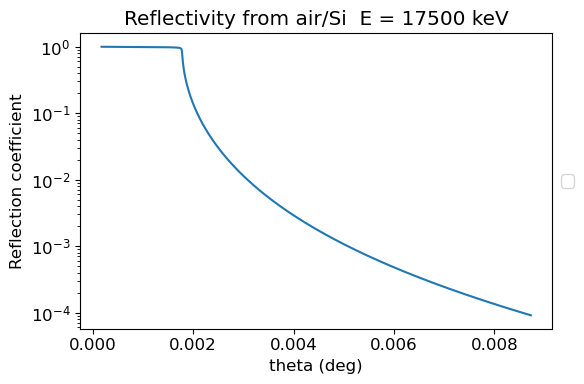

In [15]:
# Define incident angles
alpha = np.linspace(0.01, .5, 1000) * scc.degree

plt.figure(figsize=(6, 4))  # Adjust figure size to accommodate the legend
plt.rcParams.update({'font.size': 12})  # Set the default font size to 12
# Compute reflection and transmission matrices using original function
T, R, kz = mlayer_rough(alpha, E, n_r, h_i, sig_i)

plt.plot(alpha,np.abs(R)**2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.xlabel('theta (deg)')
plt.ylabel('Reflection coefficient')
plt.title(f'Reflectivity from air/Si  E = {E:5.0f} keV')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make space for the legend
plt.tight_layout()

# Save the figure and show the plot
plt.savefig('Si_air_refl.eps')
plt.show()